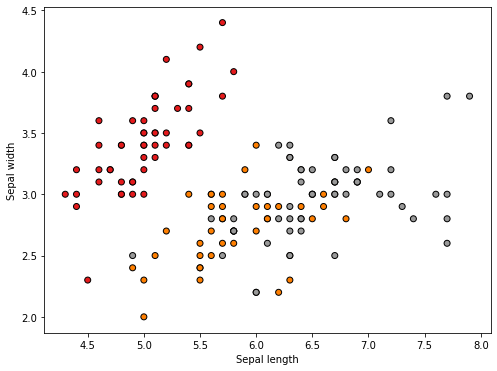

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

In [15]:
# using kmeans from sklearn for comparison
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

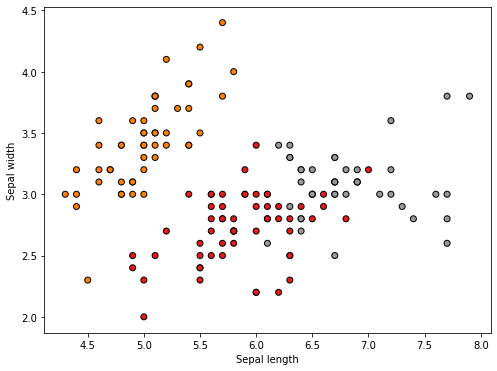

In [16]:
X = iris.data[:, :2]  # we only take the first two features.
y = kmeans.labels_

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

In [17]:
import random
import math
import numpy as np

def generate_centroid(n_centroid, label, input_dataset) :
    cluster_data = []   
    
    for x in range(n_centroid) :
        cluster = []
        for i in range(len(label)) :
            if label[i] == x :
                cluster.append(input_dataset[i])
        cluster_data.append(cluster)
    
    centroid = []
    for i in range(n_centroid) :
        centroid.append(np.average(cluster_data[i], axis=0))
    
    return centroid

def generate_cluster(centroid, input_dataset) :
    euclidian_dist = []
    for data in input_dataset :
        distances = []
        for c in centroid :
            distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(data, c)]))
            distances.append(distance)
            
        euclidian_dist.append(distances)
    
    # get cluster 
    label = []
    for dist in euclidian_dist :
        label.append(dist.index(min(dist)))
        
    return label
    

def kmeans(input_dataset, number_of_groups):
    new_label = []
    centroid = []
    
    for x in range(number_of_groups) :
        centroid.append(random.choice(input_dataset))
    
    while (1) :
        if new_label != [] :
            label = new_label
        else :
            label = generate_cluster(centroid, input_dataset)

        centroid = generate_centroid(number_of_groups, label, input_dataset)
        new_label= generate_cluster(centroid, input_dataset)  
        
        if (np.array_equal(label, new_label)) :
            break
    
    Y = new_label
    return Y

# cluster = kmeans(X, 5)
# cluster
cluster = kmeans(iris.data, 3)

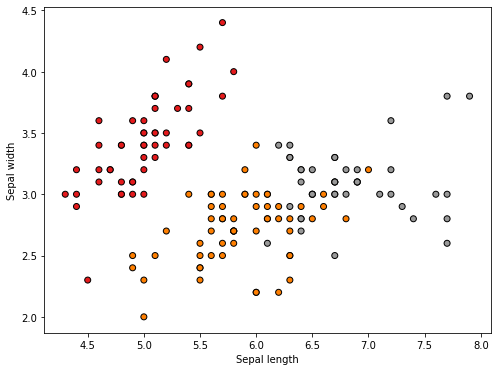

In [18]:
X = iris.data[:, :2]  # we only take the first two features.
y = cluster

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()